In [2]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np

### Загрузка и знакомство с данными
Для работы понадобятся данные из  учебного конкурса на *kaggle* [«Прогноз популярности статьи на Хабре»](https://inclass.kaggle.com/c/howpop-habrahabr-favs-lognorm). 

In [4]:
df = pd.read_csv('e:\Machine_Learning\datasets\howpop_train.csv')

In [5]:
df.shape

(134137, 17)

In [6]:
df.head(3)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656


Можно транспонировать таблицу

In [7]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на *Kaggle*). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [8]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [9]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [11]:
df.describe(include = ['object', 'bool']).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/surfingbird/blog/...,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [12]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **published** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [13]:
print(df.published.dtype)

object


In [14]:
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

datetime64[ns]


In [15]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Создадим несколько столбцов на основе данных о времени публикации:

In [16]:
df['year'] = [d.year for d in df.published]
df['month']=[d.month for d in df.published]
df['dayofweek']=[d.isoweekday() for d in df.published]
df['hour']=[d.hour for d in df.published]

In [17]:
df.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


### 1. В каком месяце (и какого года) было больше всего публикаций?¶

In [18]:
publ_df=df.groupby(['year'])['month'].value_counts()
publ_df.sort_values(ascending=False).head()

year  month
2015  3        2189
2016  3        2115
2015  7        2111
      4        2110
      12       2084
Name: month, dtype: int64

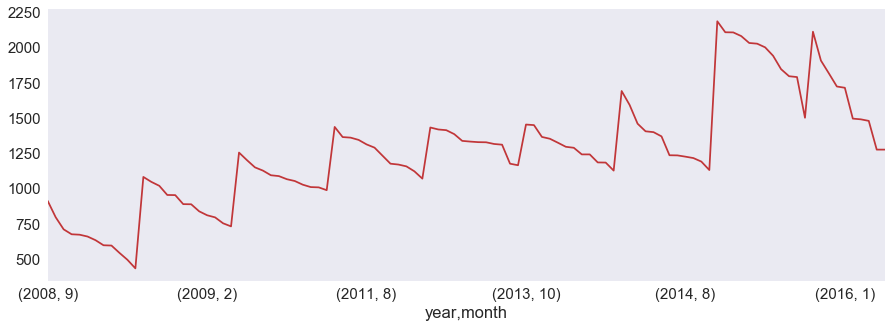

In [19]:
publ_df.plot()

### 2. Проанализируйте публикации в этом месяце (из вопроса 1)

Выберите один или несколько вариантов:
- На графике не заметны какие-либо выбросы или аномалии,
- Один или несколько дней сильно выделяются из общей картины,
- На хабре всегда больше статей, чем на гиктаймсе,
- По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей.

In [20]:
mux_publ=df[(df['year']==2015)&(df['month']==3)]
mux_publ.T

,97666,97667,97668,97669,97670,97671,97672,97673,97674,97675,...,99845,99846,99847,99848,99849,99850,99851,99852,99853,99854
url,https://habrahabr.ru/post/251783/,https://habrahabr.ru/company/kolibrios/blog/23...,https://habrahabr.ru/post/286286/,https://habrahabr.ru/post/251347/,https://habrahabr.ru/post/251765/,https://habrahabr.ru/post/251793/,https://habrahabr.ru/post/251747/,https://geektimes.ru/company/soundpal/blog/246...,https://geektimes.ru/post/246572/,https://habrahabr.ru/post/251797/,...,https://habrahabr.ru/post/254545/,https://habrahabr.ru/post/289134/,https://habrahabr.ru/post/254555/,https://habrahabr.ru/post/254425/,https://habrahabr.ru/post/254559/,https://geektimes.ru/post/248196/,https://habrahabr.ru/post/254561/,https://habrahabr.ru/post/254563/,https://habrahabr.ru/post/254565/,https://geektimes.ru/post/248200/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru,geektimes.ru,habrahabr.ru,...,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,251783,239033,286286,251347,251765,251793,251747,246570,246572,251797,...,254545,289134,254555,254425,254559,248196,254561,254563,254565,248200
published,2015-03-01 00:00:00,2015-03-01 00:09:00,2015-03-01 07:13:00,2015-03-01 07:52:00,2015-03-01 10:30:00,2015-03-01 12:04:00,2015-03-01 12:26:00,2015-03-01 12:45:00,2015-03-01 13:37:00,2015-03-01 13:55:00,...,2015-03-31 20:32:00,2015-03-31 21:53:00,2015-03-31 22:17:00,2015-03-31 22:29:00,2015-03-31 22:51:00,2015-03-31 22:53:00,2015-03-31 22:54:00,2015-03-31 22:54:00,2015-03-31 23:03:00,2015-03-31 23:19:00
author,@SLY_G,NaN,@semen_grinshtein,@Makeman,@Doomer3D,@4p4,@PavelVelikhov,NaN,@marks,@PerlPower,...,@PavelTretyakov,@SLY_G,@sidristij,@itcoder,@MaxxxZ,@alizar,@LOGX,@NikolayJuly,@Ludoedushka,@jeston
flow,develop,develop,misc,develop,develop,develop,develop,NaN,NaN,develop,...,develop,misc,develop,develop,admin,NaN,develop,develop,develop,NaN
polling,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
content_len,49647,8581,1883,48658,40374,12410,23204,3992,2756,9110,...,5075,9598,2128,12302,13352,2671,5534,8917,10489,3034
title,Введение в разработку слайд-шоу на JavaScript,Дайджест KolibriOS #7: как мы зиму перезимовали,"9 марта компания Apple сделает то, что не дела...",Context Model Pattern via Aero Framework,Заполнение текстовых шаблонов данными на основ...,Философия программирования 5 — Колибри и Реактос,Сделай сам: MSc Computer Science на уровне топ...,Sony выпустила специальные карты памяти для чи...,«Хоровод» — первое упоминание трех законов роб...,Статичный хостинг: жизнь после смерти narod.ru,...,Повреждение стека в одном из методов NSString,Краткая история банкоматов: как автоматизация ...,CLRium #2 принимает DevExpress CodeRush и запу...,JSONB запросы в PostgreSQL,Эволюция скорости передачи данных в сетях Wi-Fi,Гражданский кодекс Франции теперь на Github,Управление складом: на «волнах» операций,Облегчаем поддержку iOS приложения. Часть 1 — ...,Топ-5 самых дурацких антивирусов. Записки хули...,Дешёвых ChromeOS-устройств стало больше: хромо...
comments,6,14,12,6,4,68,63,14,35,50,...,10,1,0,12,27,15,1,7,34,11


In [21]:
#d={'habrahabr.ru':True,'geektimes.ru':False}
#mux_publ['domain']=mux_publ['domain'].map(d)

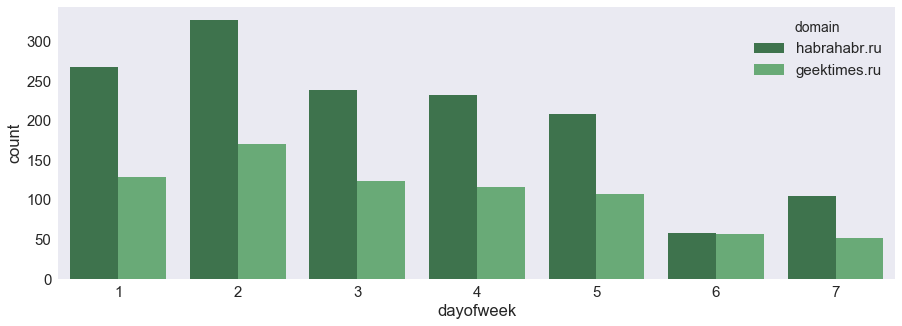

In [22]:
mux_publ.groupby(['domain'])['dayofweek'].value_counts()
sns.countplot(x="dayofweek", hue="domain", data=mux_publ,palette="Greens_d");

### 3. Выберите верное утверждение
1. Больше всего просмотров (в среднем) набирают статьи, опубликованные в 12 часов дня;
1. У опубликованных в 10 утра постов больше всего комментариев (в среднем);
1. Больше всего просмотров (в среднем) набирают статьи, опубликованные в 6 часов утра;
1. Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера;
1. На хабре дневные статьи комментируют чаще (в среднем), чем вечерние.

In [23]:
columns_to_show = ['views', 'comments']
df.groupby(['hour'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

views                               comments                  \
              mean           std amin     amax       mean        std amin   
hour                                                                        
0     17546.982349  31729.654844    3   557000  48.389066  69.123060    0   
1     17717.709114  34706.350507   62   621000  49.417910  75.799600    0   
2     17328.690581  32508.718489   78   416000  48.827025  80.086812    0   
3     18370.017972  35359.091583   74   564000  53.123877  72.105909    0   
4     20678.389091  41776.995226   82   723000  53.657273  77.101010    0   
5     17218.894242  29004.813472   62   305000  47.816686  64.382930    0   
6     21354.310115  43636.600932   66   814000  51.799618  76.905727    0   
7     19093.953408  36366.326281   81   618000  43.263561  63.437250    0   
8     16014.419048  25666.035459   82   325000  36.772222  54.798803    0   
9     16906.059099  29284.676533    4   555000  37.303444  68.868792    0   
10    16580.889909  32588.695372   76  1272000  33.620052  57.330083    0   
11    16331.186818  29741.247810   73   889000  34.768697  59.309003    0   
12    16209.416141  29852.391683   66   797000  35.199744  57.287911    0   
13    15822.606055  27483.962888   68   522000  35.811908  58.483255    0   
14    15773.203785  28307.953371    3   677000  36.131046  55.481641    0   
15    14739.224017  24961.005434   66   721000  36.113566  56.490137    0   
16    16583.150731  31836.146708   63   899000  38.557664  60.820104    0   
17    15814.881313  30312.123003   54  1233000  39.046573  62.413552    0   
18    16731.210843  35293.726262   76  1149000  40.121553  59.390680    0   
19    16926.284287  32627.112135   59   816000  41.832716  58.964780    0   
20    18134.614873  32252.593363   83   464000  45.822556  71.698682    0   
21    17605.819064  30899.680543   47   488000  46.669970  70.721300    0   
22    18365.387460  33844.454810   68   544000  46.373220  64.140535    0   
23    17631.345932  45556.915507   13  1730000  45.212471  67.155801    0   

            
      amax  
hour        
0     1261  
1     1729  
2     2266  
3      886  
4     1475  
5      832  
6      793  
7      868  
8      768  
9     2194  
10    1585  
11    1070  
12    1214  
13    1236  
14    1008  
15     908  
16    1039  
17    1829  
18    1381  
19    1076  
20    1887  
21    1578  
22     997  
23     879

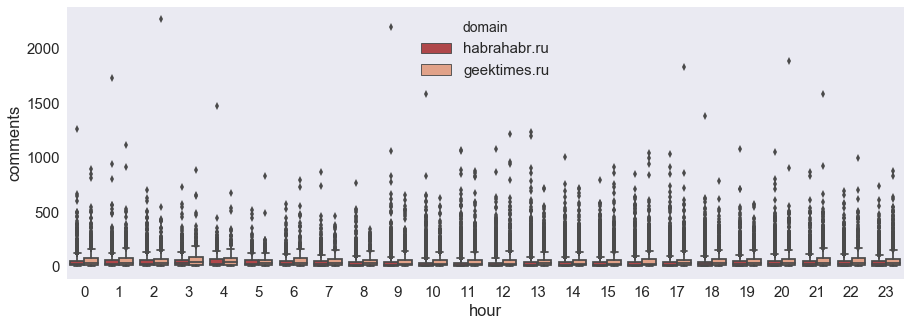

In [24]:
sns.boxplot(x="hour", y="comments", hue="domain", data=df);

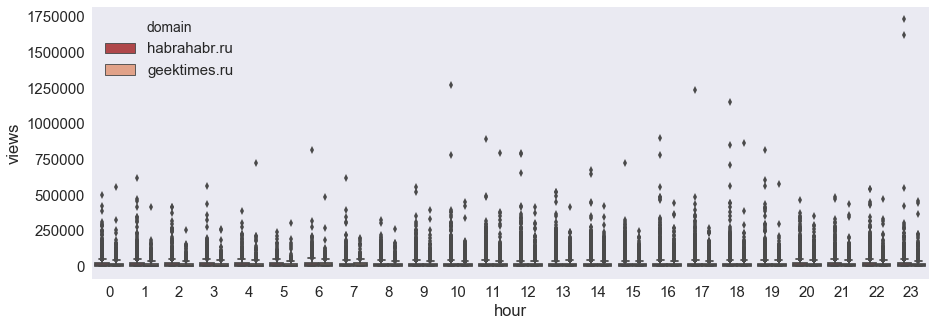

In [35]:
sns.boxplot(x="hour", y="views", hue="domain", data=df);

### 4. Кого из топ-20 авторов (по числу статей) чаще всего минусуют (в среднем)?
- @Mordatyj
- @Mithgol
- @alizar
- @ilya42

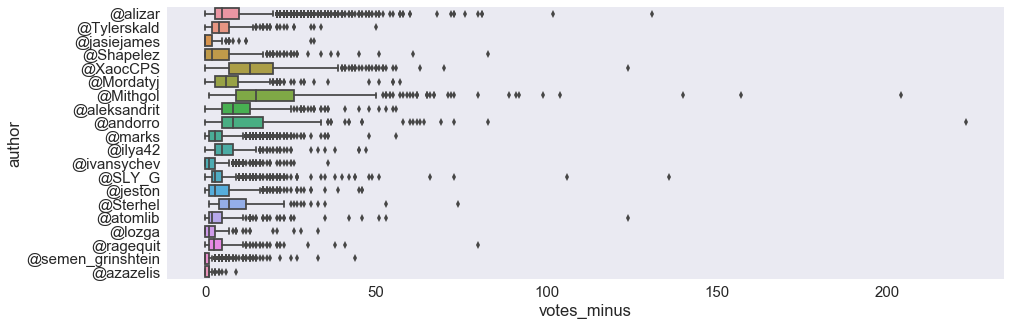

In [36]:
top_author=df.author.value_counts().sort_values(ascending=False).head(20).index.values
sns.boxplot(y="author", x="votes_minus", data=df[df.author.isin(top_author)], orient="h")

### 5. Сравните субботы и понедельники
Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

In [66]:
df['morning']=((df['hour']<16)&(df['hour']>5)).astype('int')
df['munday']=(df['dayofweek']==1).astype('int')
df['saturday']=(df['dayofweek']==6).astype('int')
df['mun_sat']=df['munday']+df['saturday'].map({1: 2, 0: 0})
df

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,...,year,month,dayofweek,hour,views_norm,views_scal,morning,munday,saturday,mun_sat
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,...,2008,1,2,18,2.36,236,0,0,0,0
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,...,2008,1,2,18,3.53,353,0,0,0,0
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,...,2008,1,2,18,12.00,1200,0,0,0,0
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,...,2008,1,3,1,57.00,5700,0,0,0,0
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,...,2008,1,3,14,14.00,1400,1,0,0,0
5,https://habrahabr.ru/post/18295/,habrahabr.ru,18295,2008-01-02 16:14:00,@lvea,develop,False,3171,Mobile2.0 Всеобщая доступность,22,...,2008,1,3,16,1.92,192,0,0,0,0
6,https://geektimes.ru/post/18306/,geektimes.ru,18306,2008-01-03 12:55:00,@abbasov,NaN,False,435,Modbook в действии,10,...,2008,1,4,12,3.01,301,1,0,0,0
7,https://habrahabr.ru/post/18311/,habrahabr.ru,18311,2008-01-03 17:20:00,@Andrey,misc,False,3291,В чем суть проекта Vladelia.ru,64,...,2008,1,4,17,1.41,141,0,0,0,0
8,https://habrahabr.ru/post/31352/,habrahabr.ru,31352,2008-01-03 22:54:00,@kvladimir,develop,False,1953,Подтверждено: Wikia Search запускается в понед...,23,...,2008,1,4,22,2.08,208,0,0,0,0
9,https://habrahabr.ru/post/18314/,habrahabr.ru,18314,2008-01-03 23:56:00,@lvea,develop,False,3712,Mobile 2.0 Выбор предпочтительного способа связи,6,...,2008,1,4,23,4.01,401,0,0,0,0


In [67]:
columns_to_show=['mun_sat']
df.groupby(['morning'])[columns_to_show].describe(percentiles=[])

mun_sat                                   
           count      mean       std  min  50%  max
morning                                            
0        64159.0  0.332268  0.621937  0.0  0.0  2.0
1        69978.0  0.272629  0.535342  0.0  0.0  2.0

In [71]:
df.groupby(['mun_sat'])['morning'].value_counts()

#sns.countplot(x="mun_sat", hue="morning", data=mux_publ,palette="Greens_d");

mun_sat  morning
0        1          53989
         0          48132
1        1          12900
         0          10736
2        0           5291
         1           3089
Name: morning, dtype: int64

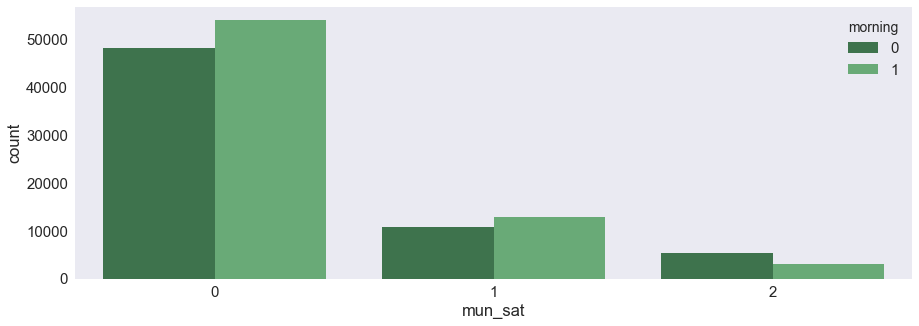

In [74]:
df.groupby(['mun_sat'])['morning'].value_counts()
sns.countplot(x="mun_sat", hue="morning", data=df,palette="Greens_d");